In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Build your custom classifier on top of VGG16
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # 10 classes in CIFAR-10

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")



58889256/58889256 [==============================] - 4s 0us/step


Epoch 1/10
782/782 [==============================] - 48s 39ms/step - loss: 1.8670 - accuracy: 0.2590 - val_loss: 1.6449 - val_accuracy: 0.3598
Epoch 2/10
782/782 [==============================] - 29s 38ms/step - loss: 1.3398 - accuracy: 0.5011 - val_loss: 1.0978 - val_accuracy: 0.6069
Epoch 3/10
782/782 [==============================] - 30s 38ms/step - loss: 1.0593 - accuracy: 0.6341 - val_loss: 0.9803 - val_accuracy: 0.6530
Epoch 4/10
782/782 [==============================] - 29s 37ms/step - loss: 0.8647 - accuracy: 0.7102 - val_loss: 0.8630 - val_accuracy: 0.7138
Epoch 5/10
782/782 [==============================] - 30s 38ms/step - loss: 0.7377 - accuracy: 0.7589 - val_loss: 0.8136 - val_accuracy: 0.7374
Epoch 6/10
782/782 [==============================] - 31s 39ms/step - loss: 0.6467 - accuracy: 0.7923 - val_loss: 0.7266 - val_accuracy: 0.7593
Epoch 7/10
782/782 [==============================] - 30s 39ms/step - loss: 0.5620 - accuracy: 0.8192 - val_loss: 0.7884 - val_accuracy:

313/313 [==============================] - 4s 11ms/step


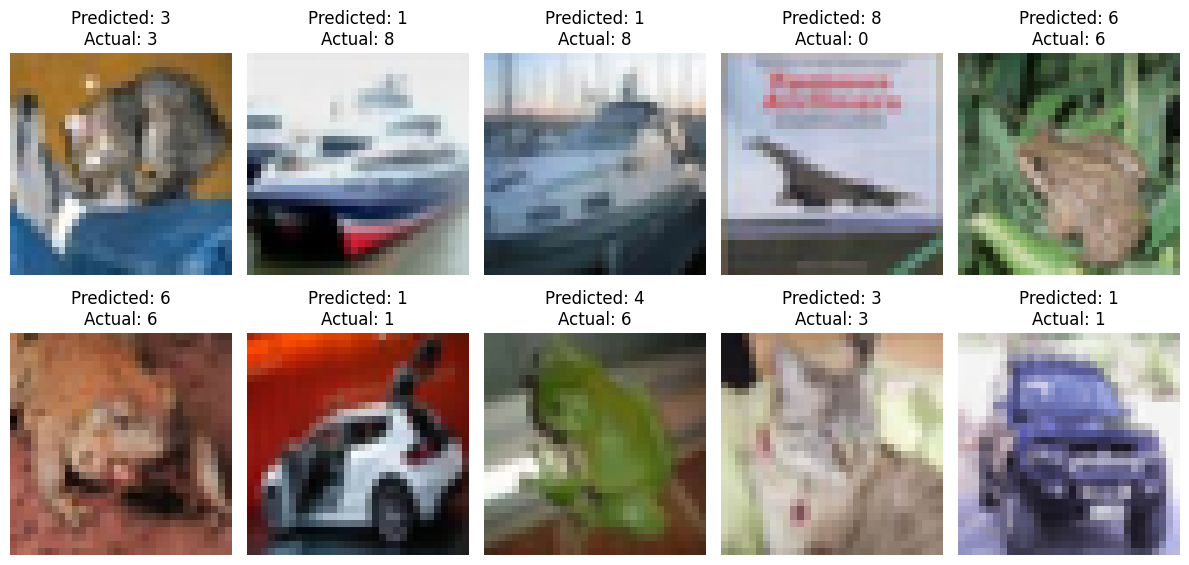

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict labels for a batch of test images
predictions = model.predict(x_test)

# Display a few sample images and their predicted labels
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {np.argmax(predictions[i])}\nActual: {np.argmax(y_test[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Epoch 1/10
782/782 [==============================] - 31s 39ms/step - loss: 0.3806 - accuracy: 0.8801 - val_loss: 0.8609 - val_accuracy: 0.7651
Epoch 2/10
782/782 [==============================] - 29s 38ms/step - loss: 0.3403 - accuracy: 0.8917 - val_loss: 0.7707 - val_accuracy: 0.7912
Epoch 3/10
782/782 [==============================] - 30s 38ms/step - loss: 0.3418 - accuracy: 0.8939 - val_loss: 0.8136 - val_accuracy: 0.7851
Epoch 4/10
782/782 [==============================] - 30s 38ms/step - loss: 0.3039 - accuracy: 0.9065 - val_loss: 0.8362 - val_accuracy: 0.7877
Epoch 5/10
782/782 [==============================] - 31s 39ms/step - loss: 0.2662 - accuracy: 0.9176 - val_loss: 0.8203 - val_accuracy: 0.8000
Epoch 6/10
782/782 [==============================] - 30s 38ms/step - loss: 0.2569 - accuracy: 0.9225 - val_loss: 0.7896 - val_accuracy: 0.8044
Epoch 7/10
782/782 [==============================] - 31s 39ms/step - loss: 0.2371 - accuracy: 0.9284 - val_loss: 1.0649 - val_accuracy:

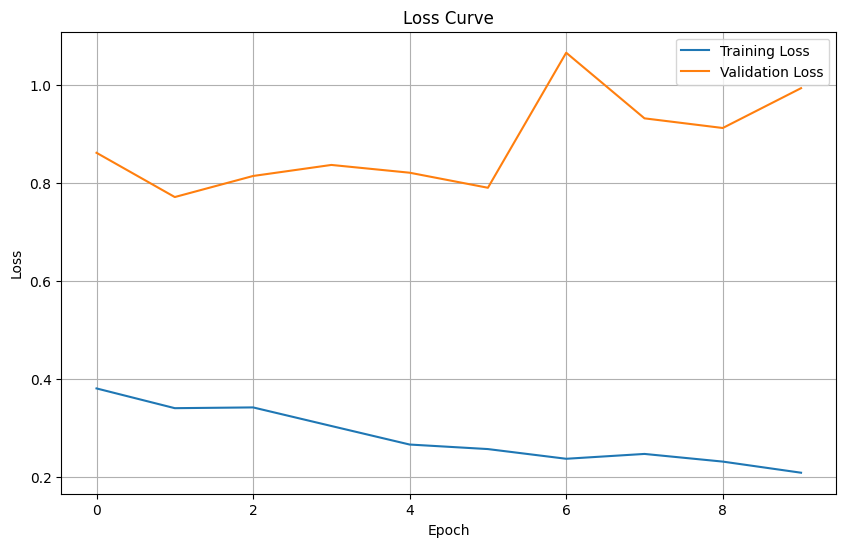

In [ ]:
import matplotlib.pyplot as plt

# Train the model and store the training history
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

# Get the training and validation loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
